In [2]:

from wid_tools import WIDDoughMaker
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from datetime import datetime,timedelta,date
%matplotlib inline


# deploy lambda git clone https://github.com/pbegle/aws-lambda-py3.6-pandas-numpy.git

# Alerts

In [3]:

p = WIDDoughMaker()
p.setUp()
p.login()
#f = p.market_rate()
#f

<Response [200]>

In [4]:
p.alerts('config/price_alerts.csv')


[{'barrel_type': 'BBR',
  'base_price': 5.92,
  'current_buy_price': 5.9,
  'distillery': 'ARDMORE',
  'qtr': 'Q4',
  'security_id': 'SPIRIT000129',
  'year': '2014'}]

TODO: 
-  py env in cloud9
- create vpc and everything from scratch, new users etc. Deploy lambda.
- default email when no updates present
- daily price update
- organize repo

# Goals:
 - Investigate what whiskey asset classes malt/grain/first-fill/refill/etc, distilleries, and ages of product are most ripe for investment and probable gain
 
# Tools:
The WIDDoughMaker fetches assets (aka pitches) and their respective price histories. Afterwards, exploratory data analysis via python

# Sample price chart
[Click me](https://www.whiskyinvestdirect.com/tullibardine/2015/Q4/BBF/chart.do)

In [2]:
p = WIDDoughMaker()
p.setUp()

# log in might not be necessary to fetch chart data, only to make bids
p.login()
#p.get_pitches()
#f = p.market()

cookies: <RequestsCookieJar[<Cookie AWSELB=E96BE383140D807901C1A39BABF2F76A34E410B225DF9A9235CCED82ABE352C11838010F31BDFE60B84800C0B01168A26FCACAD153AB1C0C10BAFCD20E02D5F58E4EB1EB42 for www.whiskyinvestdirect.com/>, <Cookie JSESSIONID=3AA00B4F337CEC21CD1F76D449E920CB for www.whiskyinvestdirect.com/>, <Cookie visits=1 for www.whiskyinvestdirect.com/>, <Cookie visits_cookie_set=Y for www.whiskyinvestdirect.com/>]>


<Response [200]>

In [10]:
import urllib3
import certifi
import requests

API_GET_VIEW_MARKET = 'https://www.whiskyinvestdirect.com/secure/api/v2/view_market_xml.do'


login_page_url = "https://www.whiskyinvestdirect.com/secure/login.do"
login_page_url2 = "https://www.whiskyinvestdirect.com/secure/j_security_check"
payload2 = {'j_username': 'filpia', 'j_password': 'Mr.brightside1'}
payload3 = {'confirmed': 'true'}
payload4 = {'simple': 'true'}

with requests.Session() as s:
    a = s.get(login_page_url)  
    print(a.cookies)
    b = s.post(login_page_url2, data = payload2,headers = a.cookies)
    #c = s.get("https://www.whiskyinvestdirect.com/secure/api/v2/view_balance_xml.do", params = payload3)
    d = s.get(API_GET_VIEW_MARKET)
    
print(a)
print(b)
print(d.content)

<RequestsCookieJar[<Cookie AWSELB=E96BE383140D807901C1A39BABF2F76A34E410B225DF9A9235CCED82ABE352C11838010F31BDFE60B84800C0B01168A26FCACAD153AB1C0C10BAFCD20E02D5F58E4EB1EB42 for www.whiskyinvestdirect.com/>, <Cookie JSESSIONID=BC2E2BD2031E1FCC93724D7DB715B112 for www.whiskyinvestdirect.com/>, <Cookie visits=1 for www.whiskyinvestdirect.com/>, <Cookie visits_cookie_set=Y for www.whiskyinvestdirect.com/>]>
<Response [200]>
<Response [200]>
<?xml version="1.0"?>
<envelope>
	<message type="MARKET_DEPTH_A" version="0.1">
		<market>
			<pitches>
				<pitch
						distillery="CAMERONBRIDGE"
						categoryName="GRAIN"
						barrelTypeCode="HHR"
						bondYear="2018"
						bondQuarter="Q1"
						securityId="SPIRIT000218"
						considerationCurrency="GBP"
					>
						<buyPrices>
							<price
									actionIndicator="B"
									quantity="300"
									limit="1.02"
								/>
							<price
									actionIndicator="B"
									quantity="4602"
									limit="1.01"
								/>
							<price
						

In [41]:
p.pitches().head()


,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId
0,HHR,Q4,2017,GRAIN,GBP,cameronbridge,SPIRIT000207
2,HHR,Q3,2017,GRAIN,GBP,cameronbridge,SPIRIT000196
4,HHR,Q4,2016,GRAIN,GBP,cameronbridge,SPIRIT000174
6,HHR,Q3,2015,GRAIN,GBP,cameronbridge,SPIRIT000156
8,HHR,Q4,2014,GRAIN,GBP,cameronbridge,SPIRIT000119


In [162]:
chart_df = pd.DataFrame()
failed_records = []

for r in p.pitches().iterrows():
    try:
        chart_df = pd.concat([p.get_chart_data(r[1].to_dict()),chart_df])
    except:
        failed_records.append(r[1].to_dict())

chart_df.head()


,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId
0,65,2016-01-18,3.92,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
1,66,2016-01-19,3.90,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
2,67,2016-01-20,3.90,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
3,68,2016-01-21,3.91,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
4,69,2016-01-22,3.91,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130


In [163]:
chart_df.to_csv('pitch_history_4_4_2018.csv',index=False)

In [164]:
cask_types = pd.read_csv('cask_types.csv')
chart_df = pd.read_csv('pitch_history_4_4_2018.csv')

chart_df['bondQuarter'] = chart_df['bondQuarter'].apply(lambda x: int(x[1]))
chart_df['yrqtr'] = chart_df.apply(lambda x: int(x['bondYear'])*10+int(x['bondQuarter']),axis=1)
chart_df['label'] = chart_df.apply(lambda x: "{}_{}_{}".format(*[x['distillery'],x['barrelTypeCode'],x['yrqtr']]) ,axis=1)
chart_df['dealDate'] = pd.to_datetime(chart_df['dealDate'])
chart_df = chart_df.merge(cask_types,on='barrelTypeCode')
chart_df.head()

,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId,yrqtr,label,barrelType
0,65,2016-01-18,3.92,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill
1,66,2016-01-19,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill
2,67,2016-01-20,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill
3,68,2016-01-21,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill
4,69,2016-01-22,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill


In [165]:
chart_df_first_date = chart_df.sort_values('dealDate').groupby(['securityId']).agg({'dealDate':'min'}).reset_index()

chart_df_first_rate = chart_df_first_date.merge(chart_df[['securityId','dealDate','priceAvg']],on=['securityId','dealDate'])

chart_df_norm = chart_df.merge(chart_df_first_rate,on=['securityId'],suffixes=('','_first'))
chart_df_norm['norm_price'] = chart_df_norm['priceAvg']/chart_df_norm['priceAvg_first']

chart_df_norm.head()

,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId,yrqtr,label,barrelType,dealDate_first,priceAvg_first,norm_price
0,65,2016-01-18,3.92,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,1.000000
1,66,2016-01-19,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.994898
2,67,2016-01-20,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.994898
3,68,2016-01-21,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.997449
4,69,2016-01-22,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.997449


In [166]:
recent_vintages = chart_df_norm[chart_df_norm['yrqtr'] > 20153]

recent_vintages.head()

,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId,yrqtr,label,barrelType,dealDate_first,priceAvg_first,norm_price
0,65,2016-01-18,3.92,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,1.000000
1,66,2016-01-19,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.994898
2,67,2016-01-20,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.994898
3,68,2016-01-21,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.997449
4,69,2016-01-22,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.997449


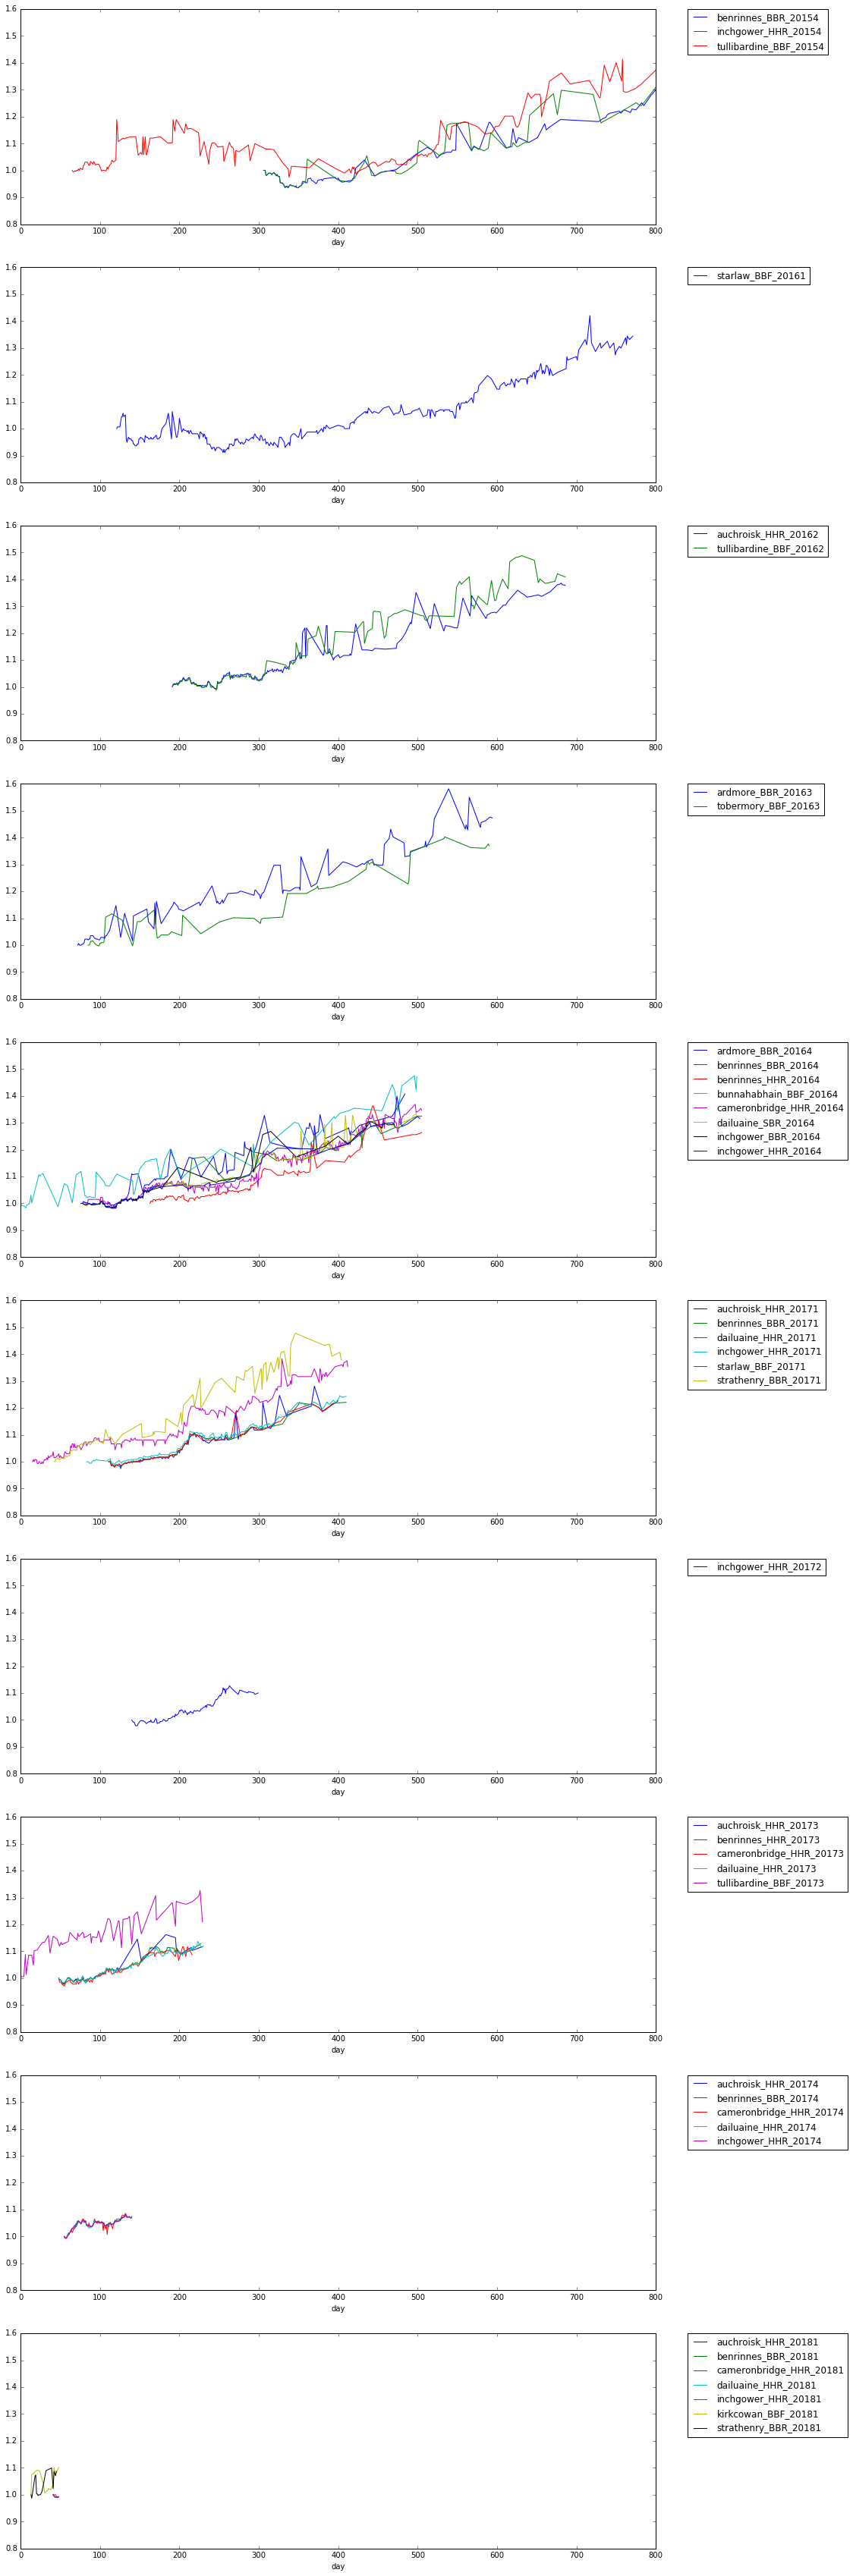

In [167]:
vintage_grouping = recent_vintages.groupby('yrqtr')

fig, ax = plt.subplots(len(vintage_grouping),figsize=(15,60))

plot_counter = 0
for yrqtr_label, yrqtr_grp in vintage_grouping:
    for spirit_label, spirit_grp in yrqtr_grp.groupby('label'):
        spirit_grp.plot(x = 'day', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax[plot_counter].set_xlim(0,800)
        ax[plot_counter].set_ylim(.8,1.6)
    plot_counter += 1
plt.show()

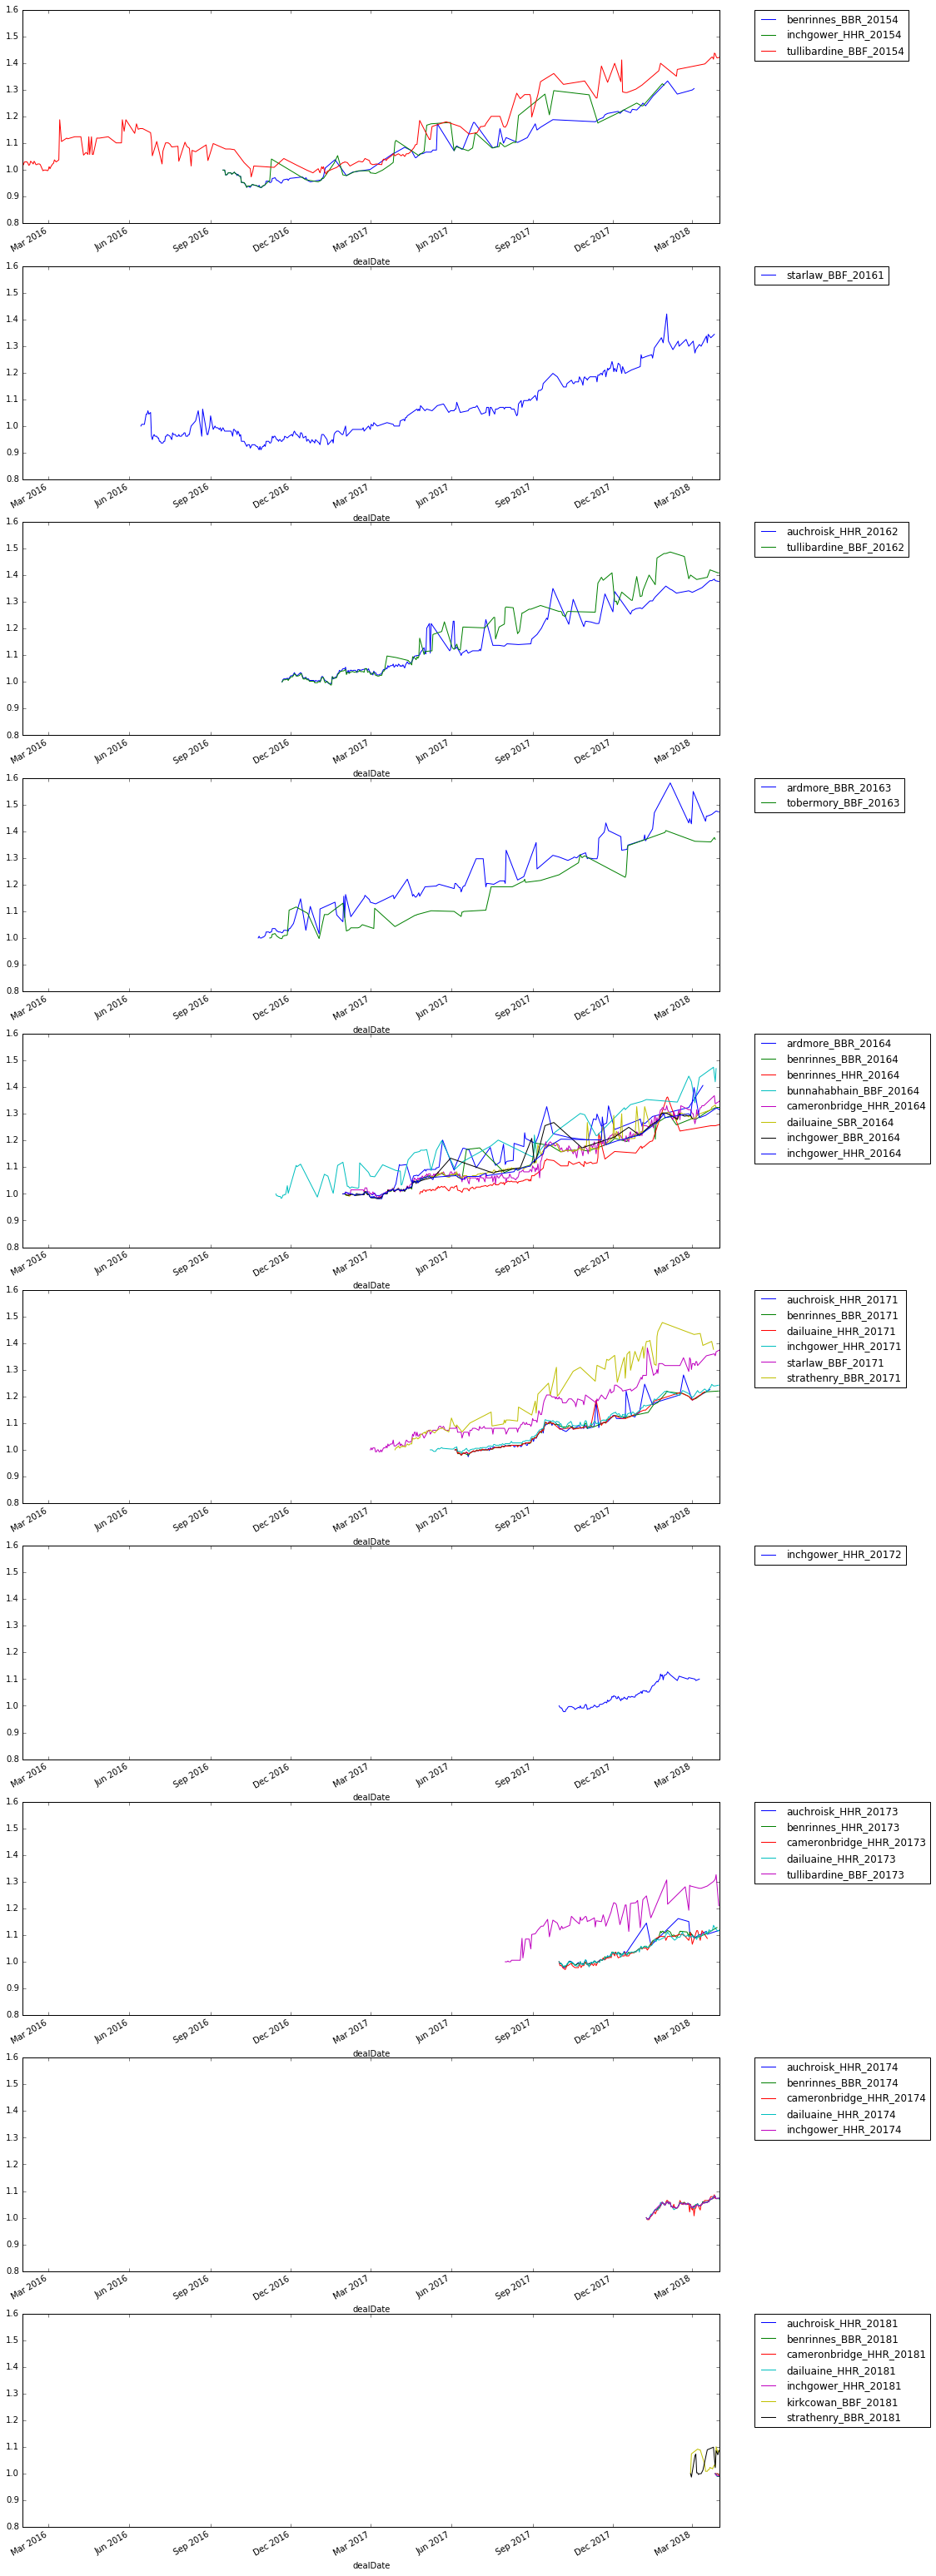

In [168]:
vintage_grouping = recent_vintages.groupby('yrqtr')

fig, ax = plt.subplots(len(vintage_grouping),figsize=(15,60))

plot_counter = 0
for yrqtr_label, yrqtr_grp in vintage_grouping:
    for spirit_label, spirit_grp in yrqtr_grp.groupby('label'):
        spirit_grp.plot(x = 'dealDate', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax[plot_counter].set_xlim(date(2016,2,1),date(2018,4,1))
        ax[plot_counter].set_ylim(.8,1.6)
    plot_counter += 1
plt.show()

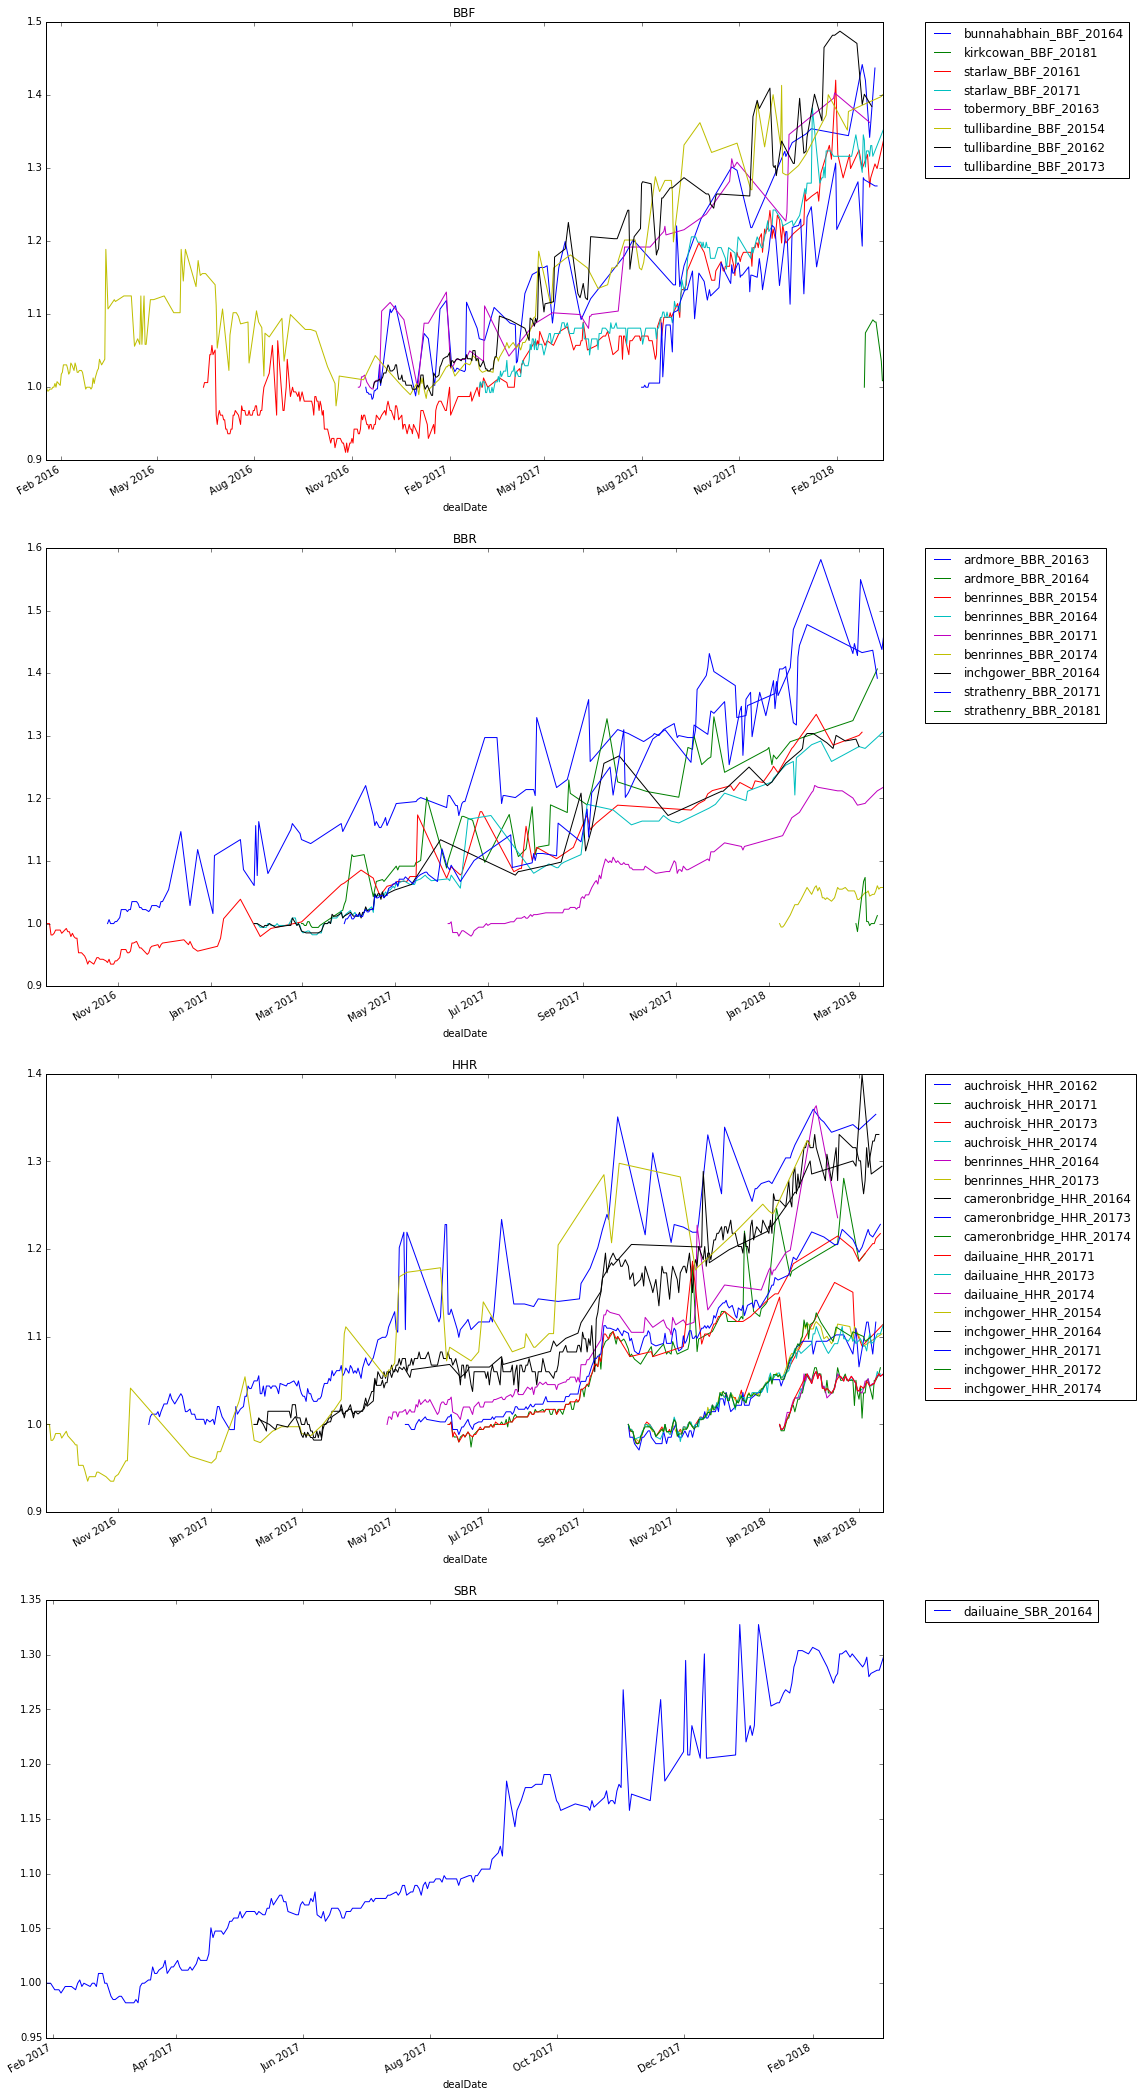

In [93]:
barrel_grouping = recent_vintages.groupby('barrelTypeCode')

fig, ax = plt.subplots(len(barrel_grouping),figsize=(15,40))

plot_counter = 0
for bt_label, bt_grp in barrel_grouping:
    ax[plot_counter].set_title(bt_label)
    for spirit_label, spirit_grp in bt_grp.groupby('label'):
        spirit_grp.plot(x = 'dealDate', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plot_counter += 1
plt.show()

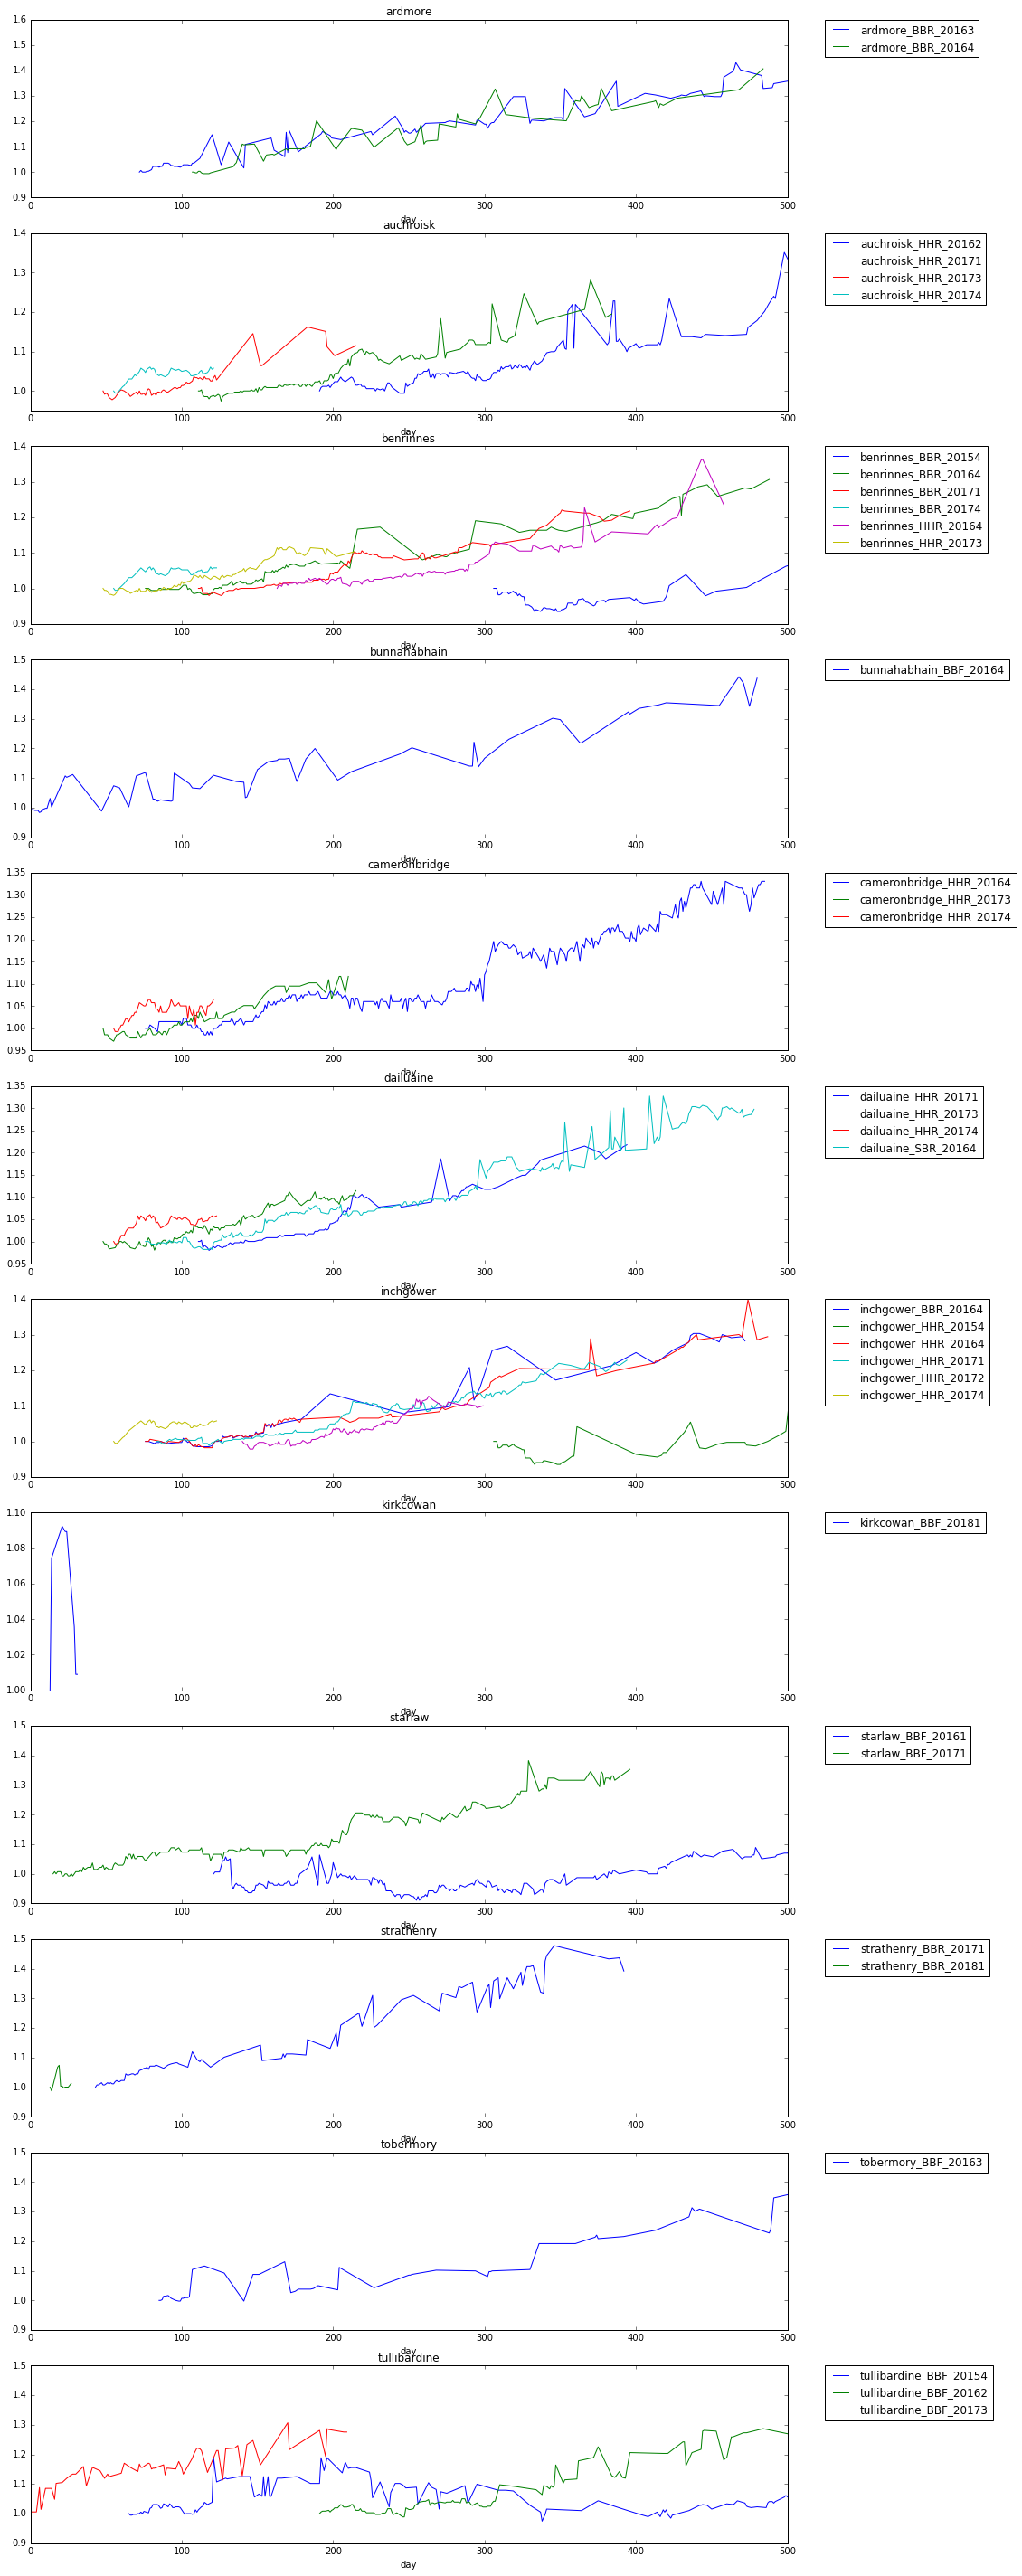

In [92]:
distillery_grouping = recent_vintages.groupby('distillery')

fig, ax = plt.subplots(len(distillery_grouping),figsize=(15,50))

plot_counter = 0
for dist_label, dist_grp in distillery_grouping:
    ax[plot_counter].set_title(dist_label)
    for spirit_label, spirit_grp in dist_grp.groupby('label'):
        spirit_grp.plot(x = 'day', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax[plot_counter].set_xlim(0,500)
    plot_counter += 1
plt.show()

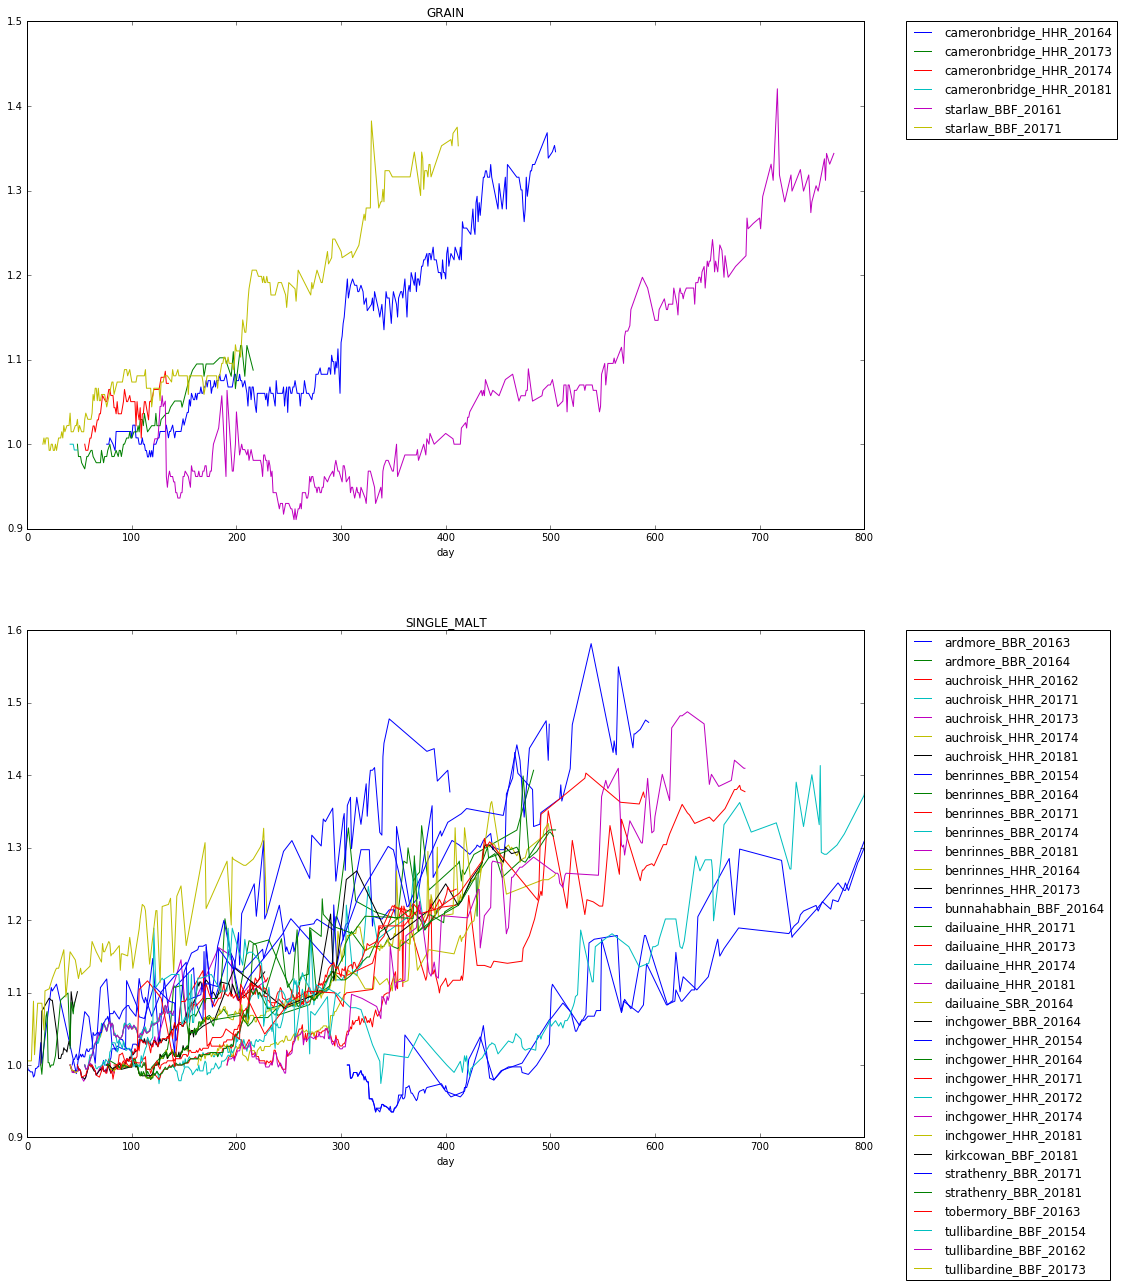

In [169]:
cat_grouping = recent_vintages.groupby('categoryName')

fig, ax = plt.subplots(len(cat_grouping),figsize=(15,20))

plot_counter = 0
for cat_label, cat_grp in cat_grouping:
    ax[plot_counter].set_title(cat_label)
    for spirit_label, spirit_grp in cat_grp.groupby('label'):
        spirit_grp.plot(x = 'day', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax[plot_counter].set_xlim(0,800)
    plot_counter += 1
plt.show()

# Note: 
From the charts grouping by category, I noticed similar magnitude spikes in two of the grain whiskeys about 100 days apart. Since these two in particular differ in age by 1 quarter I suspected that the spikes occured on the same calendar dates. Verified below.

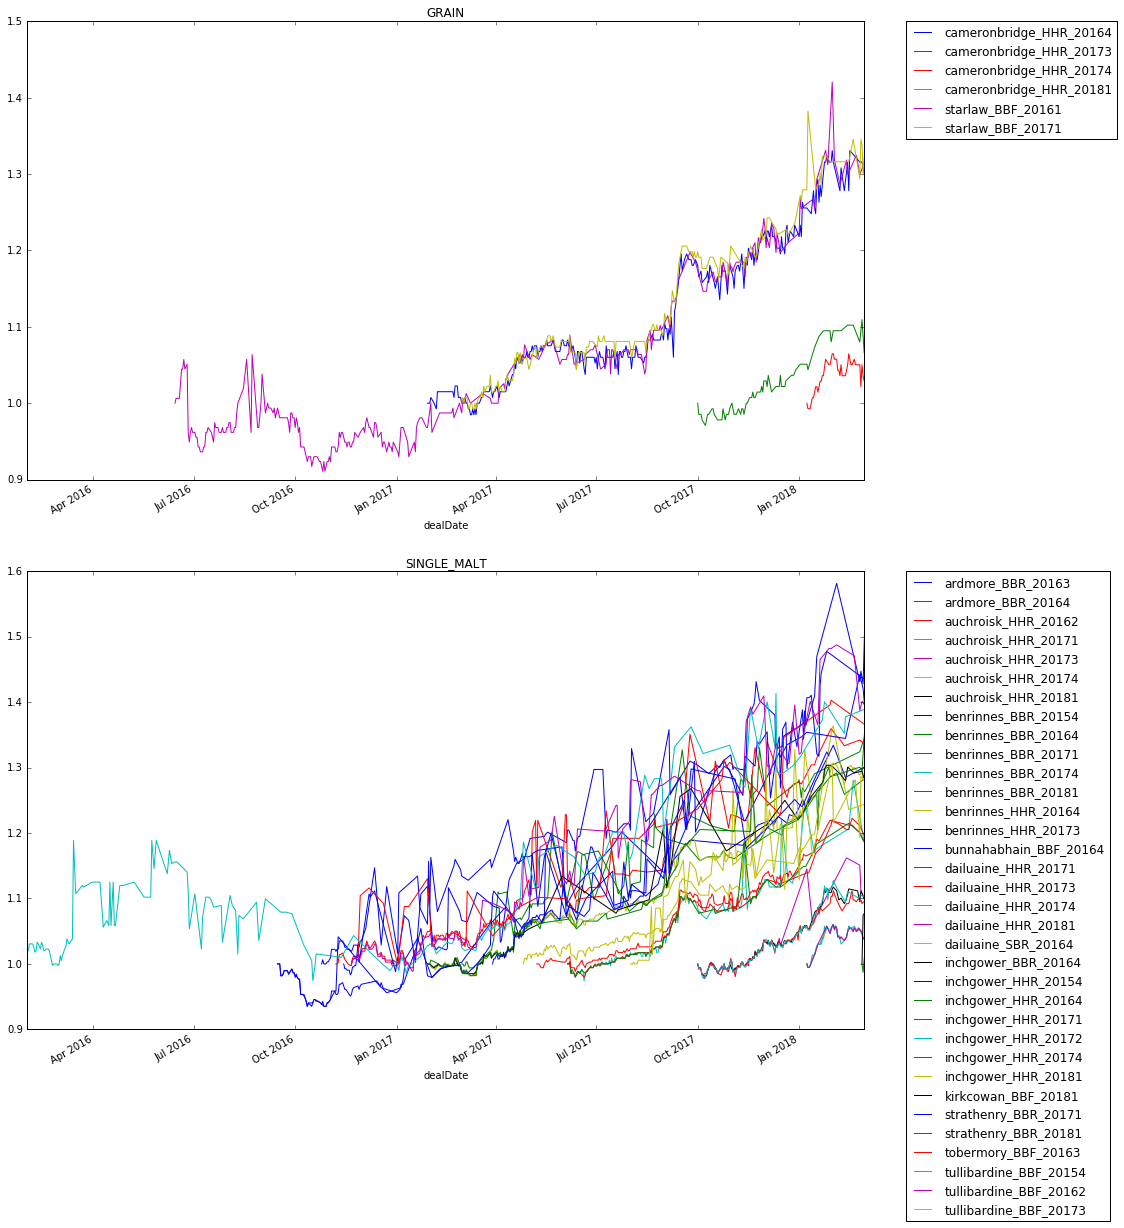

In [170]:
cat_grouping = recent_vintages.groupby('categoryName')

fig, ax = plt.subplots(len(cat_grouping),figsize=(15,20))

plot_counter = 0
for cat_label, cat_grp in cat_grouping:
    ax[plot_counter].set_title(cat_label)
    for spirit_label, spirit_grp in cat_grp.groupby('label'):
        spirit_grp.plot(x = 'dealDate', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax[plot_counter].set_xlim(date(2016,2,1),date(2018,3,1))
    plot_counter += 1
plt.show()

# Note: 
Confirmed, the movement in grains is nearly identical across the whole category. When you look at the price for single malt, it's evident that all products on the site move nearly in unison. 

# Next steps:

It's clear that there are general market movements that drive up the price of all products on the site. Want to divide out from each product the movement of the market as a whole to see whether any consistently perform above market.
To measure movement of the market without diluting the market index with the inclusion of new products, generate a series which is the avg day over day % increase (or maybe $ increase)? For products with no trades on that day, day over day % increase == np nan instead of 0.0 since I don't want the zeros of inactive products to dilute. Once we divide out the market movement from the individual products it might be clearer which outperform the market, is there a true breakout period for young products, etc.. Can we adapt the concept of beta from stocks to this?

In [171]:
labels_ascending_num_days = list(recent_vintages.groupby('label').count().sort_values('day',ascending=False).reset_index()['label'])
print(len(labels_ascending_num_days))
labels_ascending_num_days[:5]

40


['starlaw_BBF_20161',
 'cameronbridge_HHR_20164',
 'dailuaine_SBR_20164',
 'starlaw_BBF_20171',
 'tullibardine_BBF_20154']

# Visualizing aggregate movement of the market

After taking the n labels with the greatest amount of days with a deal made, I...
- filled in their price on the days without days as the last available price
- computed the day over day change for each label using the foward-filled data
- replace days with 0 change with np.nan so they don't factor into the daily average change
- compute daily average change
- compute 4-day lagged average of day over day % change

In [172]:
# maps zeros to nan
rep_zeros = lambda x: np.nan if x == 0 else x
    
def smooth_market(num_labels_in_index = 5, d_over_d_window = 7):
    label_list = labels_ascending_num_days[:num_labels_in_index]
    vintage_block = recent_vintages[recent_vintages.apply(lambda x: x['label'] in label_list and x['dealDate'].date()>=date(2016,6,14),axis=1)]\
                                                            .groupby(['label','dealDate']).agg({'norm_price':'mean'})\
                                                            .unstack(0).fillna(method='ffill')
    vintage_d_over_d_change = ((vintage_block-vintage_block.shift(1))/vintage_block.shift(1)).replace(0,np.nan).mean(axis=1)
    
    whiskey_master_d_d_change = vintage_d_over_d_change.ewm(d_over_d_window).mean()
    
    whiskey_master_series = np.ones(1)

    for v in list(whiskey_master_d_d_change):
        if not np.isnan(v):
            whiskey_master_series = np.append(whiskey_master_series,whiskey_master_series[-1]*(1+v))

    whiskey_master = pd.DataFrame(index=whiskey_master_d_d_change.index)
    whiskey_master['deriv'] = whiskey_master_d_d_change
    whiskey_master['signal'] = whiskey_master_series

    return whiskey_master


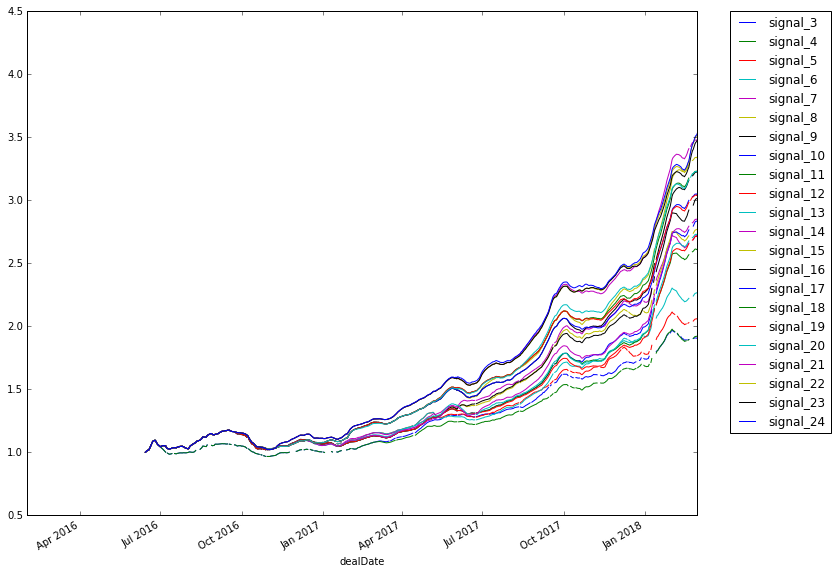

In [173]:
num_labels_in_index = 3
max_labels_in_index = 25
wid_index_iter = smooth_market(num_labels_in_index).add_suffix('_{}'.format(num_labels_in_index))

for num_labels_in_index in np.arange(num_labels_in_index+1,max_labels_in_index):
    wid_index_iter = pd.concat([wid_index_iter, smooth_market(num_labels_in_index).add_suffix('_{}'.format(num_labels_in_index))],axis=1)
    
wid_to_plot = wid_index_iter[[x for x in wid_index_iter.columns if 'signal_' in x]]
fig,ax = plt.subplots(1,figsize=(12,10))

wid_to_plot.plot(ax=ax)

ax.set_xlim(date(2016,2,1),date(2018,3,1))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [174]:
print([x.split('_')[-1] for x in labels_ascending_num_days[:7]])
print([x.split('_')[-1] for x in labels_ascending_num_days[7:16]])


['20161', '20164', '20164', '20171', '20154', '20171', '20162']
['20162', '20171', '20164', '20173', '20171', '20154', '20164', '20163', '20171']


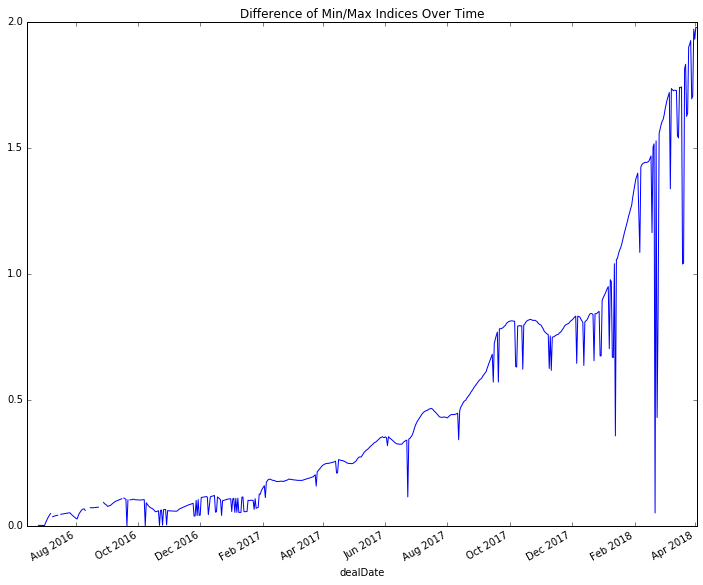

In [175]:
wid_range = wid_to_plot.max(axis=1)-wid_to_plot.min(axis=1)
wid_range.apply(rep_zeros).plot(figsize=(12,10))
plt.title("Difference of Min/Max Indices Over Time")
plt.show()

# Notes:
The charts above look at the changing of the Whisky Invest Direct index as a function of how many labels are included in the index. The `x` in `signal_x` designates the number of labels included. They are added in descending order of the number of `dealDate` for which there is an average price for that label. Another way to look at it is that they are added in descending order of activity. This activity is not intra-day activity since the scraped data doesn't have that information. Instead, it summarizes across days. 

The charts suggest that the less active labels typically have larger % changes between days in which they've had price changes, as evidenced by the lines is the charts above with more labels included contributing to greater separation in the WID indices. 

Until January, there was about a 45 point difference in the value of the indices with the greatest and smallest values. Beyond that point, that gap ballooned to over 100 points, currently at 130.

I posit that any portfolio of labels built solely on older labels will be insulated from the most drastic swings


In [176]:
wid_to_plot['signal_7'].head()

dealDate
2016-06-14    1.000000
2016-06-15    1.006369
2016-06-16    1.012779
2016-06-18    1.019230
2016-06-19    1.033423
Name: signal_7, dtype: float64

In [177]:
recent_vintages_merge = recent_vintages.merge(pd.DataFrame(wid_to_plot['signal_3']),left_on='dealDate',right_index=True)
recent_vintages_merge['price_denorm'] = recent_vintages_merge['norm_price']/recent_vintages_merge['signal_3']
recent_vintages_merge.head()


,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId,yrqtr,label,barrelType,dealDate_first,priceAvg_first,norm_price,signal_3,price_denorm
75,215,2016-06-16,4.53,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,1.155612,1.012779,1.141031
756,123,2016-06-16,1.58,1,BBF,1,2016,GRAIN,GBP,starlaw,SPIRIT000149,20161,starlaw_BBF_20161,Bourbon First Fill,2016-06-14,1.57,1.006369,1.012779,0.993671
76,224,2016-06-25,4.47,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,1.140306,1.096959,1.039515
763,132,2016-06-25,1.65,1,BBF,1,2016,GRAIN,GBP,starlaw,SPIRIT000149,20161,starlaw_BBF_20161,Bourbon First Fill,2016-06-14,1.57,1.050955,1.096959,0.958062
77,225,2016-06-26,4.36,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,1.112245,1.082429,1.027546


In [114]:
def relabel_multi(multi_index_cols):
    # helper function to relabel DF after groupby+agg
    labels = multi_index_cols.labels
    levels = multi_index_cols.levels

    indices = list(zip(labels[0],labels[1]))
    new_labels = []
    for ind in indices:
        if levels[1][ind[1]] != '':
            new_labels.append('_'.join([ levels[0][ind[0]], levels[1][ind[1]]  ]))
        else: 
            new_labels.append(levels[0][ind[0]])

    return new_labels

In [178]:
v_block = recent_vintages[recent_vintages.apply(lambda x: x['dealDate'].date()>=date(2016,6,14),axis=1)]\
                                                            .groupby(['label','dealDate']).agg({'norm_price':'mean'})\
                                                            .unstack(0).fillna(method='ffill')
deltas = ((v_block-v_block.shift(1))/v_block.shift(1)).replace(0,np.nan)

# wid_index_iter['deriv_7']

deltas.columns = relabel_multi(deltas.columns) 

comp_key = 'deriv_7'
comp = wid_index_iter[comp_key]
records = []

for l in deltas.columns:
    temp = deltas[l]
    record = {} 
    m = pd.DataFrame(comp).merge(pd.DataFrame(temp),left_index=True,right_index=True,how='inner').dropna()
    
    record['label'] = l.replace('norm_price_','')
    record['len'] = m.shape[0]
    record['coeff'] = np.corrcoef(m[l],m[comp_key])[1,0]
    
    records.append(record)

coeffs = pd.DataFrame(records).sort_values('coeff',ascending=False).reset_index(drop=True)
coeffs.head(20)

C:\Users\Fil\Anaconda2\lib\site-packages\numpy\lib\function_base.py:2079: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\Fil\Anaconda2\lib\site-packages\numpy\lib\function_base.py:2087: RuntimeWarning: invalid value encountered in true_divide
  return (dot(X, X_T.conj())/fact).squeeze()


,coeff,label,len
0,0.579862,tullibardine_BBF_20154,127
1,0.426268,auchroisk_HHR_20162,157
2,0.390498,starlaw_BBF_20161,245
3,0.366307,starlaw_BBF_20171,135
4,0.302109,inchgower_HHR_20174,48
5,0.282359,cameronbridge_HHR_20164,213
6,0.278835,benrinnes_BBR_20171,81
7,0.278404,benrinnes_BBR_20174,39
8,0.264964,benrinnes_HHR_20173,80
9,0.262582,inchgower_HHR_20154,65


In [ ]:
#Stable: Inchgower HHR 20174, Benrinnes BBR 20174, Blair Athol 

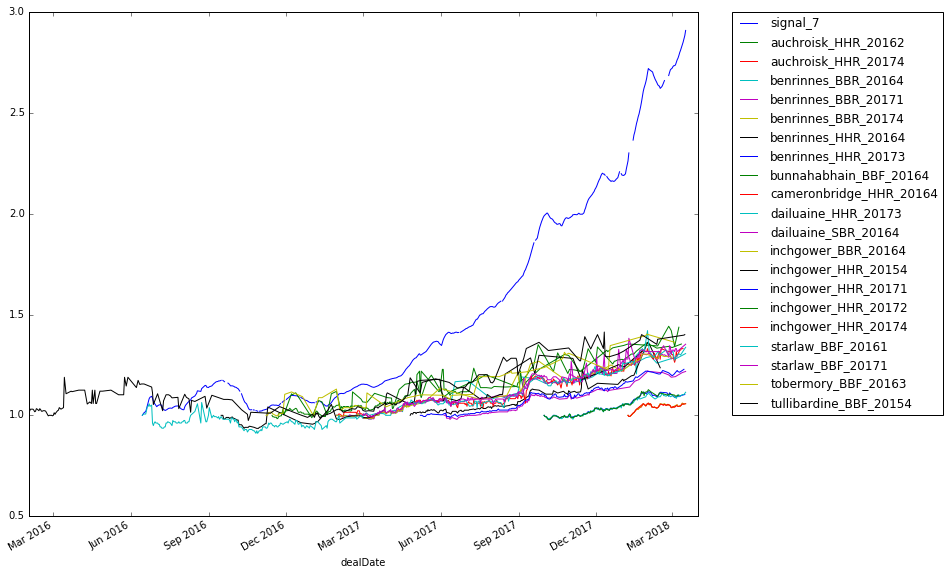

In [156]:
vintage_grouping = recent_vintages[recent_vintages['label'].apply(lambda x: x in coeffs.head(20)['label'].values)].groupby('label')

fig, ax = plt.subplots(1,figsize=(12,10))

wid_to_plot['signal_7'].plot(x = 'dealDate', y = 'price_denorm',ax = ax)

for spirit_label, spirit_grp in vintage_grouping:
    spirit_grp.plot(x = 'dealDate', y = 'norm_price',ax = ax, label = spirit_label)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_xlim(date(2016,2,1),date(2018,4,1))
    #ax[plot_counter].set_ylim(.8,1.6)
plt.show()


In [159]:
recent_vintages[recent_vintages['label'].apply(lambda x: 'blair' in x)]

,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId,yrqtr,label,barrelType,dealDate_first,priceAvg_first,norm_price
